In [26]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [27]:
df = pd.read_csv('labels_train.csv')
df

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1
...,...,...,...,...,...,...
132401,1479506176491553178.jpg,166,186,139,156,1
132402,1479506176491553178.jpg,182,204,142,153,1
132403,1479506176491553178.jpg,239,261,139,155,1
132404,1479506176491553178.jpg,259,280,139,157,1


In [28]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [29]:
check(df)

,column,dtypes,nunique,sum_null
0,frame,object,18000,0
1,xmin,int64,476,0
2,xmax,int64,477,0
3,ymin,int64,207,0
4,ymax,int64,285,0
5,class_id,int64,5,0


In [30]:
classes = df.class_id.unique()
print(classes)

[1 3 2 5 4]


In [31]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [32]:
boxes = {}
images = {}

base_path = 'images/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[14]

    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

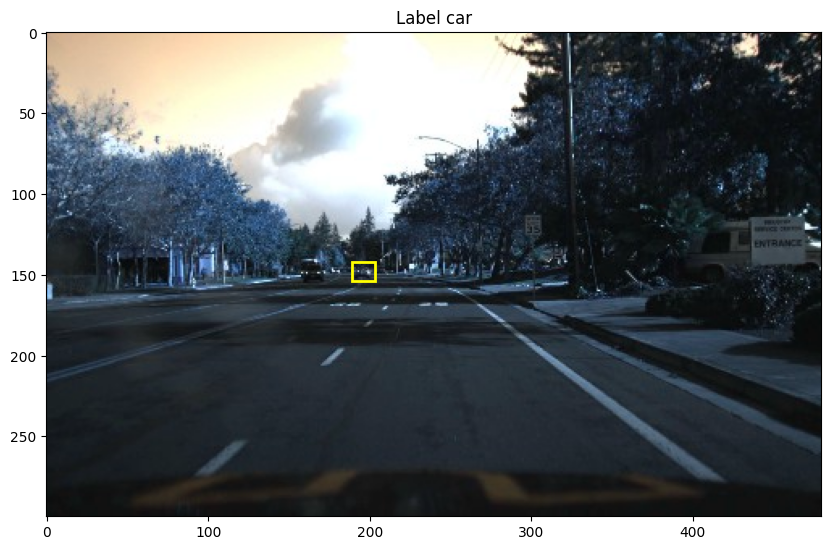

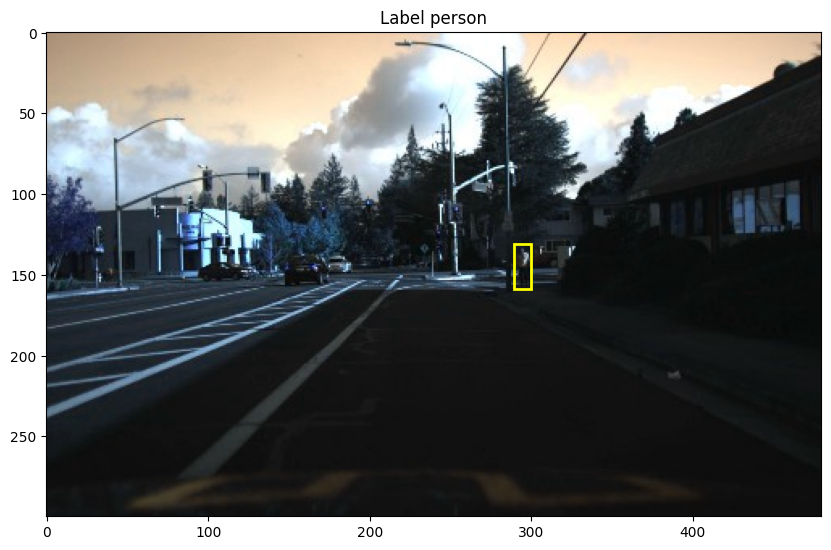

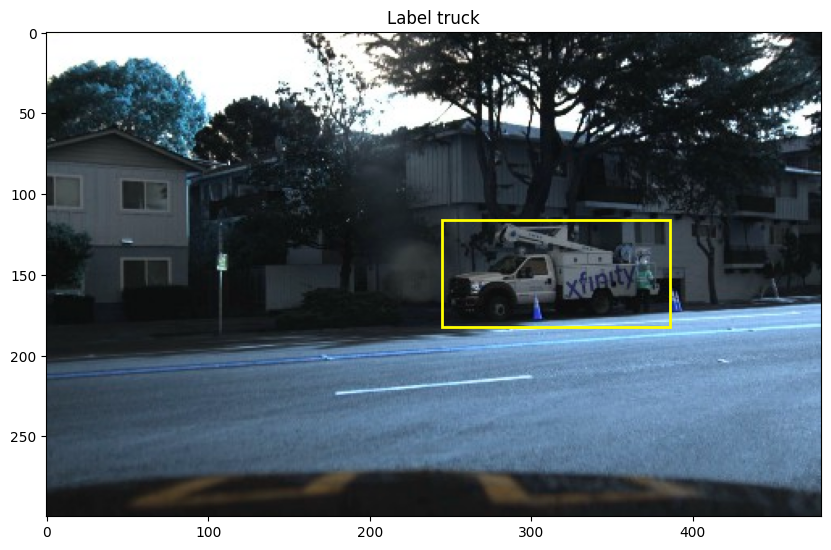

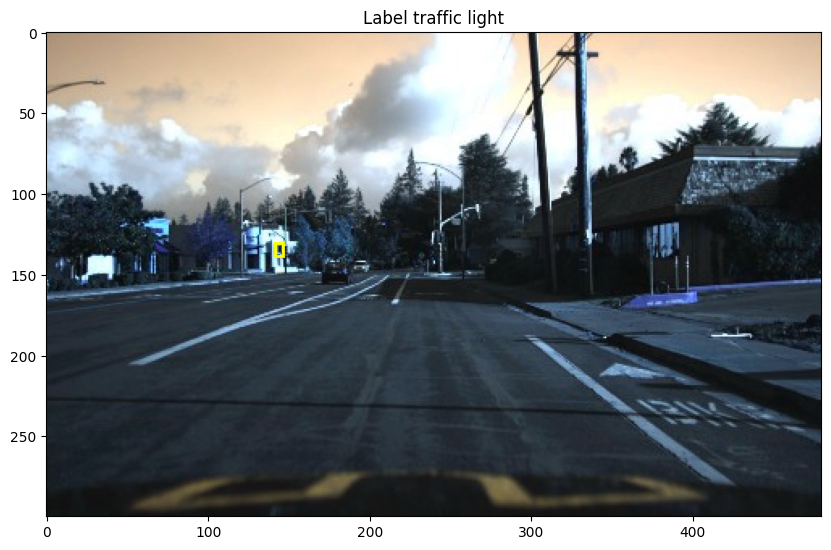

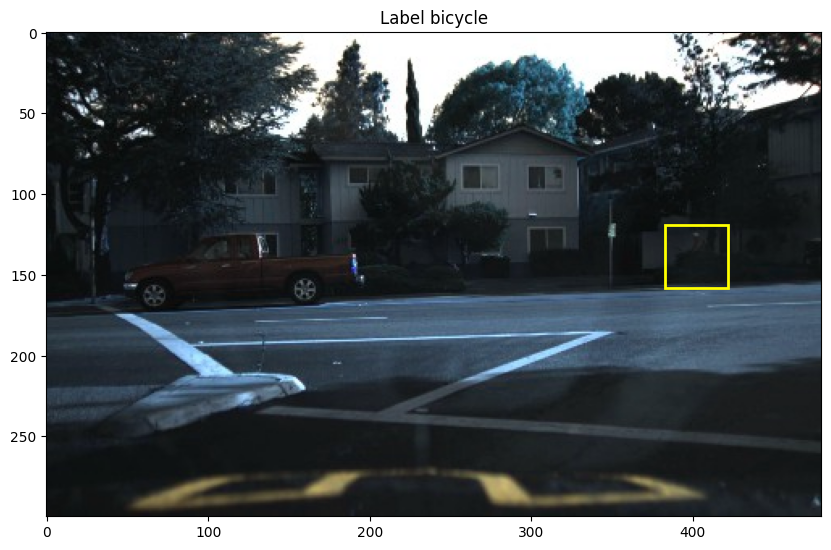

In [33]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(10, 15))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()

In [34]:
pip install ultralytics

In [35]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display

In [36]:
model = YOLO("yolov8m.pt")

In [37]:
results = model.predict(source="images/images/1478020797209407466.jpg", save=True, conf=0.2,iou=0.5)


image 1/1 /content/images/images/1478020797209407466.jpg: 416x640 1 car, 1204.5ms
Speed: 3.3ms preprocess, 1204.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


In [38]:
r = results[0]
box = r.boxes[0]
box

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.])
conf: tensor([0.9162])
data: tensor([[326.6223, 141.8517, 404.6710, 187.0176,   0.9162,   2.0000]])
id: None
is_track: False
orig_shape: (300, 480)
shape: torch.Size([1, 6])
xywh: tensor([[365.6466, 164.4347,  78.0487,  45.1659]])
xywhn: tensor([[0.7618, 0.5481, 0.1626, 0.1506]])
xyxy: tensor([[326.6223, 141.8517, 404.6710, 187.0176]])
xyxyn: tensor([[0.6805, 0.4728, 0.8431, 0.6234]])

In [39]:
for r in results:
    boxes = r.boxes
    masks = r.masks
    probs = r.probs

In [40]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [326.62225341796875, 141.8516845703125, 404.6709899902344, 187.0176239013672]
Probability: 0.9162338376045227


In [41]:
for box in r.boxes:
    class_id = r.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)

    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("\n")

Object type: car
Coordinates: [327, 142, 405, 187]
Probability: 0.92




In [42]:
results1 = model.predict(source="images/images/1478020801721033310.jpg", save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /content/images/images/1478020801721033310.jpg: 416x640 1 car, 1177.8ms
Speed: 4.6ms preprocess, 1177.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2


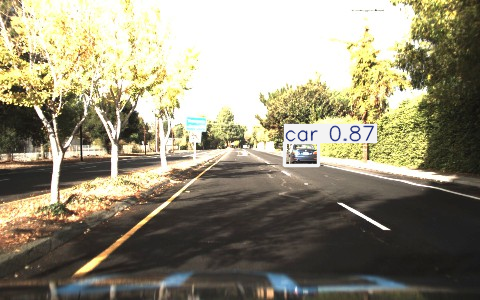

In [43]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

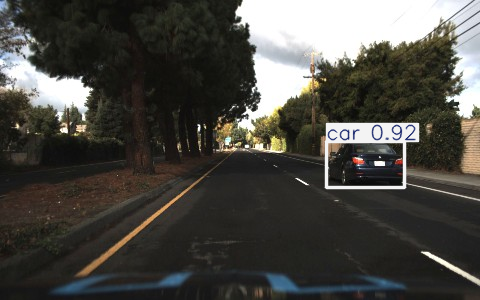

In [44]:
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))